In [1]:
import torch 
import numpy as np 
from model import VAE 
from PIL import Image 
import matplotlib.pyplot as plt 
import onnxruntime as ort

In [2]:
def save_as_onnx(pth_file = "./variational_autoencoder.pth", onnx_path = "vae_model_10e.onnx"): 
    model = VAE(4, 128, 64, 4)
    model.load_state_dict(
        torch.load(
            pth_file, 
            map_location=torch.device('cpu')
        )
    )
    model.eval() 

    decoder = model.decoder 
    sample_tensor = torch.randn(1, model.latent_dim).to('cpu')

    torch.onnx.export(
        decoder, 
        sample_tensor, 
        onnx_path, 
        export_params=True, 
        opset_version=10, 
        do_constant_folding=True, 
        input_names=['input_name'], 
        output_names=['output_name']
    )

In [3]:
# save_as_onnx(pth_file = "./pth_files/variational_autoencoder_10e.pth", onnx_path = "./onnx_files/decoder_model_10e.onnx") 
# save_as_onnx(pth_file = "./pth_files/variational_autoencoder_30e.pth", onnx_path = "./onnx_files/decoder_model_30e.onnx") 
# save_as_onnx(pth_file = "./pth_files/variational_autoencoder_50e.pth", onnx_path = "./onnx_files/decoder_model_50e.onnx") 

In [4]:
def generate_latent_vectors(num_samples = 1, latent_dim = 64):
    latent_vectors = torch.randn(num_samples, latent_dim)
    return latent_vectors

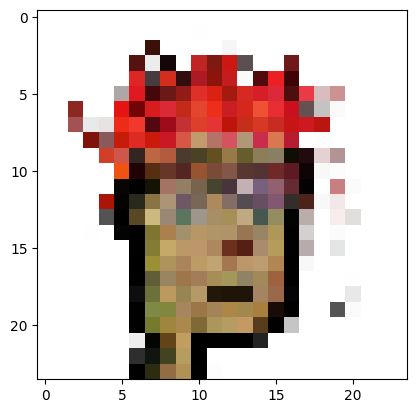

In [13]:
model_path = './onnx_files/decoder_model_30e.onnx'
ort_sess = ort.InferenceSession(model_path)
latent_vectors = generate_latent_vectors()
outputs = ort_sess.run(None, {'input_name': latent_vectors.detach().cpu().numpy()})
plt.imshow(np.clip(outputs[0][0].transpose(1, 2, 0), 0, 1))
plt.show()

In [ ]:
plt.imshow(np.clip(outputs[0][0].transpose(1, 2, 0), 0, 1))
plt.show()